<a href="https://colab.research.google.com/github/HasnainTariq1/CNN-cats-dogs-classification/blob/main/cnn_cats_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from time import time

In [2]:
# Import necessary libraries for file handling
from google.colab import files

# Upload Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Set the Kaggle configuration directory environment variable
os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [5]:
# Download the dogs-vs-cats competition dataset from Kaggle
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:07<00:00, 162MB/s]
100% 812M/812M [00:07<00:00, 107MB/s]


In [6]:
# Unzip the downloaded datasets
!unzip dogs-vs-cats.zip
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [3]:
# Define the paths to your datasets
train_dir = '/content/train'

# Check if the training and test directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"The specified training path does not exist: {train_dir}")


# Function to load images and labels from a specified folder
def load_images_from_folder(path):

  images=[] # List to store loaded images
  labels=[] # List to store corresponding labels


 # Iterate through each file in the specified folder
  for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))  # Read the image file

    if img is not None:
      img = cv2.resize(img,(64,64)) # Resize to a standard size
      images.append(img) # Append the resized image to the list

      label= filename.split('.')[0]  # Get label from filename
      labels.append(label) # Append the label to the list

  if not labels:
        raise ValueError("No labels found. Please check the image files in the directory.")

  return np.array(images),np.array(labels)

In [4]:
# Load training images and labels
train_images, train_labels=load_images_from_folder(train_dir)

In [5]:
# Convert categorical labels (e.g., 'cat', 'dog') to numeric labels
label_encoder=LabelEncoder()
train_labels_encoded= label_encoder.fit_transform(train_labels)# Encode labels as numbers


# Flatten the images
n_samples = len(train_images)
train_images_flattened= train_images.reshape(n_samples,-1)

# Split the data into training and testing sets  80% train, 20% test
X_train, X_test, Y_train, Y_test=train_test_split(train_images_flattened,train_labels_encoded,test_size= 0.2, random_state=45)


# Print shapes to verify the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", Y_train.shape)
print("Testing labels shape:", Y_test.shape)


Training data shape: (20000, 12288)
Testing data shape: (5000, 12288)
Training labels shape: (20000,)
Testing labels shape: (5000,)


In [6]:
# convert the data type of the images to float32
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')


# Normalize the pixel values to a range between 0 and 1 # Zero is for black  #1 is for White
X_train /=255
X_test /=255

# Reshape to include the channel dimension (64x64x3 for RGB images)
X_train=X_train.reshape(X_train.shape[0],64,64,3)
X_test=X_test.reshape(X_test.shape[0],64,64,3)

#Building CNN

In [7]:
# Define the dimensions of the input image (height, width, channels)
img_rows, img_cols, channels=64, 64, 3

# Define the number of filters for each CNN layer
filters=[6, 32, 128, 128]


In [8]:
# Initialize a sequential model
model = Sequential()

# Add the first convolutional layer with ReLU activation and same padding
# Input shape is defined as (64, 64, 3)
model.add(Conv2D(filters[0],(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,channels)))
# Add a max pooling layer to reduce the image size and extract key features
model.add(MaxPooling2D((2,2))) #reducing image size


# Add the second convolutional layer
model.add(Conv2D(filters[1],(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters[2],(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))

# Add the fourth convolutional layer
model.add(Conv2D(filters[3],(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))

# Flatten the output
model.add(Flatten())

# Add a dense (fully connected) layer with 64 units and ReLU activation
model.add(Dense(64,activation='relu'))

# Output layer for binary classification (using sigmoid for probability output)
model.add(Dense(1,activation='sigmoid'))

# Compile the model with binary_crossentropy loss for binary classification
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer=opt)

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 6)           │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,705 (1.21 MB)

 Trainable params: 317,705 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Record the current time to measure training time
tic = time()

# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=40, validation_split=0.2, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print(f"Model training took {toc - tic } secs")



Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 85s 208ms/step - accuracy: 0.5326 - loss: 0.6878 - val_accuracy: 0.6130 - val_loss: 0.6579
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 141s 206ms/step - accuracy: 0.6269 - loss: 0.6404 - val_accuracy: 0.6457 - val_loss: 0.6298
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 145s 213ms/step - accuracy: 0.6965 - loss: 0.5804 - val_accuracy: 0.7237 - val_loss: 0.5377
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 148s 230ms/step - accuracy: 0.7379 - loss: 0.5301 - val_accuracy: 0.7660 - val_loss: 0.4934
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 147s 241ms/step - accuracy: 0.7723 - loss: 0.4758 - val_accuracy: 0.7760 - val_loss: 0.4717
Model training took 713.1923854351044 secs


#Testing the Model

In [15]:
# Select the first 20 samples from the test set for visualization
X_valid= X_test[0:20]

# Predict probabilities for the selected validation samples using the trained model
y_pred_probs_valid= model.predict(X_valid)

# Convert predicted probabilities to binary predictions (1 if probability > 0.5, else 0)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

# Convert the predictions from numeric to text labels
y_pred_labels = label_encoder.inverse_transform(y_pred_valid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Predict the probabilities for the test set using the trained model
y_pred_probs= model.predict(X_test, verbose=0)

# Convert probabilities to binary predictions (1 if probability > 0.5, else 0)
y_pred=np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print(f"\nTest accuracy: {test_accuracy}")


Test accuracy: 0.767


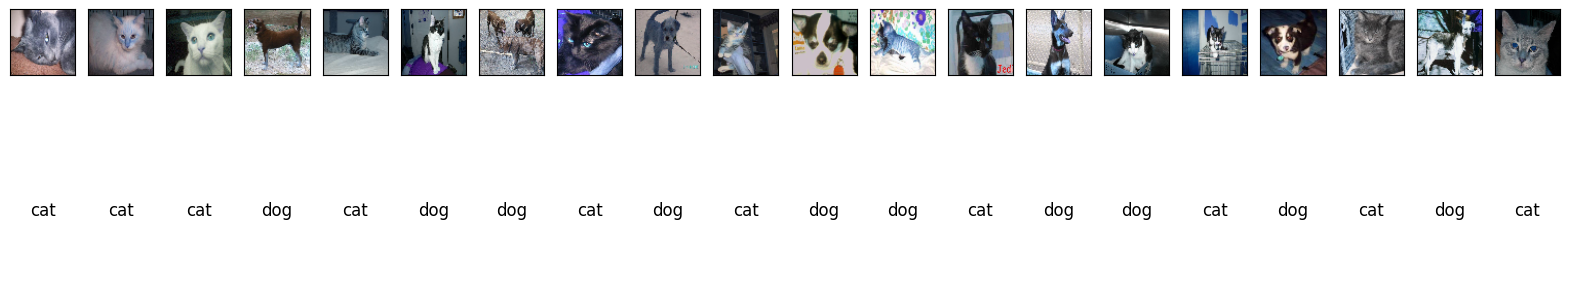

In [20]:
# Set up a figure to display imagees
n= len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
  # Display the original Image
  ax= plt.subplot(2, n, i+1)
  plt.imshow(X_valid[i].reshape(64,64,3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display the predicted
  predicted = y_pred_labels[i]
  ax = plt.subplot(2, n, i+1 +n)
  plt.text(0.5, 0.5, str(predicted), fontsize=12, ha='center', va='center')
  plt.axis('off')

#Show the plotted images
plt.show()


#close the plot
plt.close()